In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
from sklearn.datasets import load_breast_cancer

In [132]:
cancer = load_breast_cancer()

In [133]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [134]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [135]:
df_feature  = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [136]:
df_feature.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [138]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

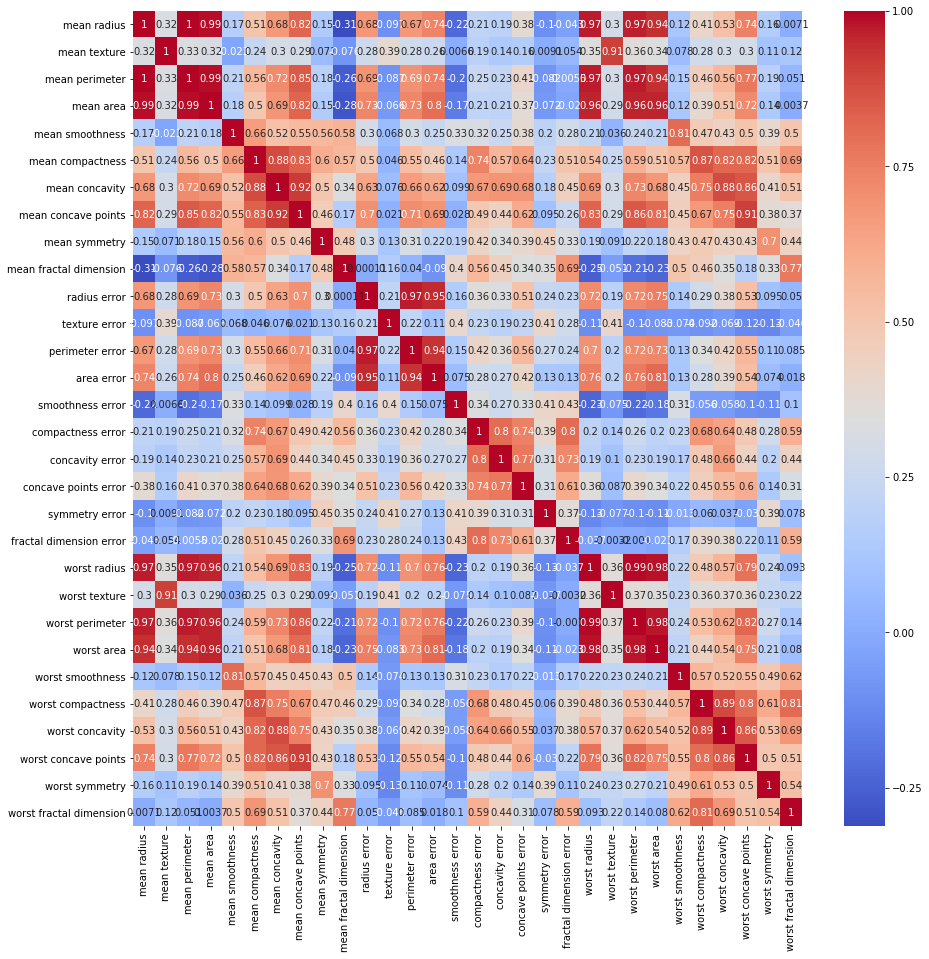

In [139]:
plt.figure(figsize  = (15,15))
sns.heatmap(df_feature.corr(), cmap = 'coolwarm', annot = True)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
 X_train, X_test, y_train, y_test = train_test_split(df_feature,np.ravel(df_target) , test_size=0.33, random_state=101)

In [142]:
from sklearn.svm import SVC

In [143]:
model = SVC()

In [144]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
predictions = model.predict(X_test)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
print(confusion_matrix(y_test,predictions))

[[  0  71]
 [  0 117]]


In [148]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        71
          1       0.62      1.00      0.77       117

avg / total       0.39      0.62      0.48       188



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

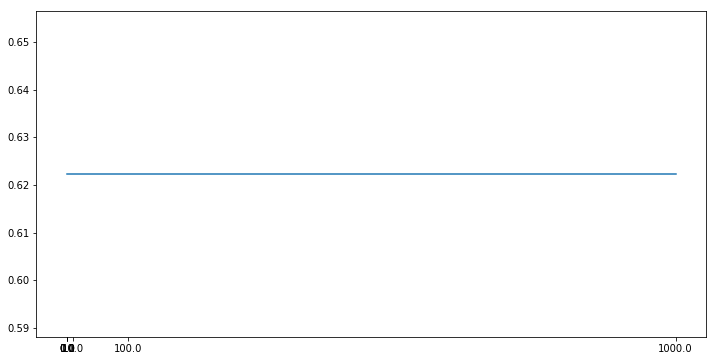

Accuracies for different values of C are: [ 0.62234043  0.62234043  0.62234043  0.62234043  0.62234043  0.62234043
  0.62234043] with the max value as  0.622340425532


In [150]:
C_value = np.power(10, np.linspace(-3,3,7))
a=pd.Series()
x=[0.001, 0.01,.1,1,10,100,1000]
for i in C_value:
    model=SVC(C=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_test,predictions)))
plt.plot(C_value, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of C are:',a.values,'with the max value as ',a.values.max())

In [151]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [100,10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'sigmoid']} 

In [152]:
from sklearn.grid_search import GridSearchCV

In [153]:
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 3)

In [154]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 105 candidates, totalling 315 fits
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=100, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=100, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=100, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ........ C=0.1, gamma=100, kernel=linear, score=0.937008 -   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ........ C=0.1, gamma=100, kernel=linear, score=0.976378 -   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=100, kernel=linear, score=0.944882 -   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] ....... C=0.1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] ....... C=0.1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] ....... C=0.1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ............ C=0.1, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ............ C=0.1, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ............ C=0.1, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] .

[CV] .......... C=1, gamma=100, kernel=linear, score=0.913386 -   1.0s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .......... C=1, gamma=100, kernel=linear, score=0.984252 -   0.4s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .......... C=1, gamma=100, kernel=linear, score=0.968504 -   0.2s
[CV] C=1, gamma=100, kernel=sigmoid ..................................
[CV] ......... C=1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1, gamma=100, kernel=sigmoid ..................................
[CV] ......... C=1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1, gamma=100, kernel=sigmoid ..................................
[CV] ......... C=1, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] .............. C=1, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] .

[CV] ......... C=10, gamma=100, kernel=linear, score=0.921260 -   0.6s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ......... C=10, gamma=100, kernel=linear, score=0.976378 -   1.8s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ......... C=10, gamma=100, kernel=linear, score=0.944882 -   4.1s
[CV] C=10, gamma=100, kernel=sigmoid .................................
[CV] ........ C=10, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=10, gamma=100, kernel=sigmoid .................................
[CV] ........ C=10, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=10, gamma=100, kernel=sigmoid .................................
[CV] ........ C=10, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ............. C=10, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ........ C=100, gamma=100, kernel=linear, score=0.921260 -   1.1s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] ........ C=100, gamma=100, kernel=linear, score=0.968504 -   4.9s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] ........ C=100, gamma=100, kernel=linear, score=0.952756 -   5.5s
[CV] C=100, gamma=100, kernel=sigmoid ................................
[CV] ....... C=100, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=100, gamma=100, kernel=sigmoid ................................
[CV] ....... C=100, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=100, gamma=100, kernel=sigmoid ................................
[CV] ....... C=100, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ............ C=100, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] .

[CV] ....... C=1000, gamma=100, kernel=linear, score=0.921260 -   0.9s
[CV] C=1000, gamma=100, kernel=linear ................................
[CV] ....... C=1000, gamma=100, kernel=linear, score=0.976378 -   4.6s
[CV] C=1000, gamma=100, kernel=linear ................................
[CV] ....... C=1000, gamma=100, kernel=linear, score=0.960630 -   9.2s
[CV] C=1000, gamma=100, kernel=sigmoid ...............................
[CV] ...... C=1000, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1000, gamma=100, kernel=sigmoid ...............................
[CV] ...... C=1000, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1000, gamma=100, kernel=sigmoid ...............................
[CV] ...... C=1000, gamma=100, kernel=sigmoid, score=0.629921 -   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ........... C=1000, gamma=10, kernel=rbf, score=0.629921 -   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  4.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [155]:
grid.best_params_

{'C': 1, 'gamma': 100, 'kernel': 'linear'}

In [156]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
grid_predictions = grid.predict(X_test)

In [158]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 62   9]
 [  4 113]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.91        71
          1       0.93      0.97      0.95       117

avg / total       0.93      0.93      0.93       188



In [ ]:
# We can see that after applying Grid Search Cross Validation the Precision of the model got increased.